<a href="https://colab.research.google.com/github/GimenesPaula/GimenesPaula/blob/main/Celu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
#Dominant Color
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from collections import Counter
import pprint

In [63]:
#Importa arquivo a ser tratado
from google.colab import files
imagem = files.upload()
filename = next(iter(imagem))

Saving Direita Depois.jpg to Direita Depois.jpg


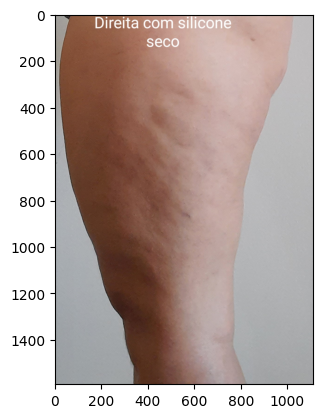

In [64]:
analisar = cv2.imread(filename)
img = cv2.cvtColor(analisar, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [65]:
# Check the image matrix data type (could know the bit depth of the image)
print(img.dtype)
# Check the height of image
print(img.shape[0])
# Check the width of image
print(img.shape[1])
# Check the number of channels of the image
print(img.shape[2])

uint8
1592
1114
3


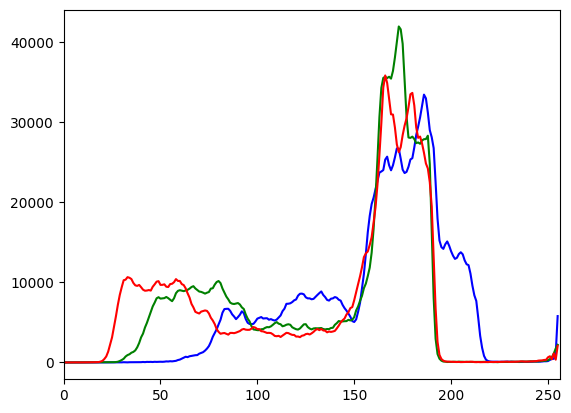

In [66]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [67]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [68]:
im2 = 255 - gray_image

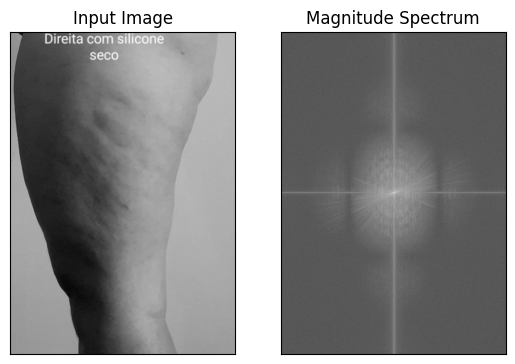

In [69]:
# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv2.blur(gray_image,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(imBlur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

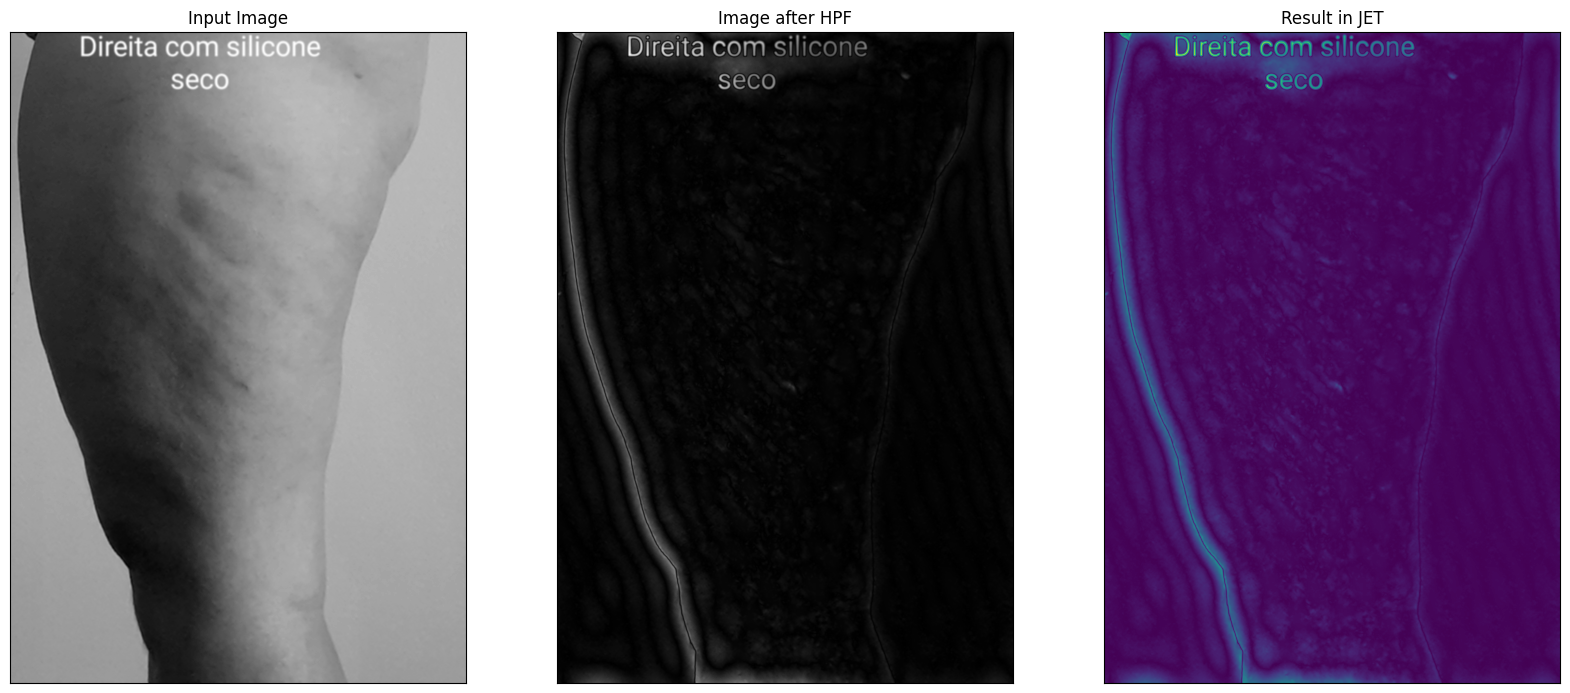

In [70]:
#This section demonstrates conducting a high pass filter to remove the low frequency component, resulting in a sharpened image which contains the edges
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()